<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [59]:
# следующая строчка подключает сертификат для защищенного соединения
#ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
#url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv('world-happiness-report-2019.csv')

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [60]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [62]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [63]:
df['Positive affect'].isnull().sum()

1

In [64]:
df[df['Positive affect'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [65]:
df['Freedom'].isnull().sum()

1

In [66]:
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [67]:
df.drop([28], inplace=True)

In [68]:
df['Positive affect'].isnull().sum()

0

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         155 non-null    object 
 1   Ladder                   155 non-null    int64  
 2   SD of Ladder             155 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    151 non-null    float64
 10  Healthy life
expectancy  149 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

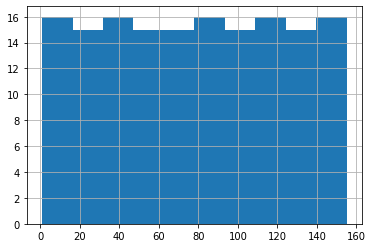

In [70]:
df['Freedom'].hist()
#равномерное распределение

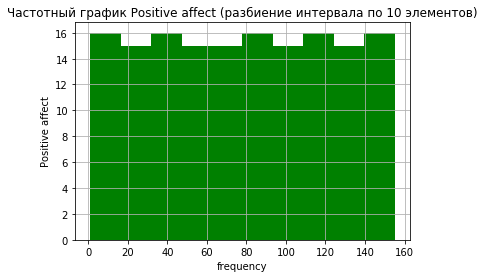

In [71]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [72]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  78.0


In [73]:
print('Значение моды: ', statistics.mode(df['Freedom']))

StatisticsError: no unique mode; found 155 equally common values

Почему нельзя найти моду?

In [74]:
#нельзя найти, так как нет явно выраженных повторяющихся значений (встречающихся больше всего раз)
df['Freedom'].unique

<bound method Series.unique of 0        5.0
1        6.0
2        3.0
3        7.0
4       19.0
       ...  
151     21.0
152     78.0
153    155.0
154    133.0
155    154.0
Name: Freedom, Length: 155, dtype: float64>

In [75]:
print('Матожидание: ',statistics.mean(df['Freedom']))
#матожидание=медиане, так как к-во значений нечетное (155)

Матожидание:  78.0


In [76]:
print('Максимум: ',max(df['Freedom']))

Максимум:  155.0


In [77]:
print('Минимум: ',min(df['Freedom']))

Минимум:  1.0


In [78]:
print('размах: ',max(df['Freedom'])-min(df['Freedom']))

размах:  154.0


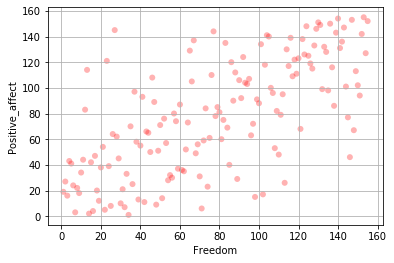

In [82]:
#Выбросы
Freedom = df['Freedom']
Positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(Freedom, Positive_affect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive_affect')
plt.show()
#выбросов нет, nan удален ранее (строка с индексом 28)

In [84]:
print('стандартное отклонение: ',statistics.pstdev(df['Freedom']))

стандартное отклонение:  44.74371464239419


In [85]:
print('дисперсия: ',statistics.pvariance(df['Freedom']))

дисперсия:  2002.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601657


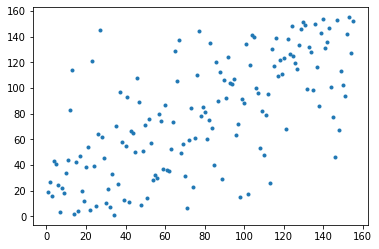

In [92]:
from scipy.stats import pearsonr
x=df['Freedom']
y=df['Positive affect']
corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)
#знак коэффициента корреляции Пирсона (положительный) говорит о том что есть положительная зависимость 
#(прямая корреляция)значений - при росте значения Freedom значения Positive affect растут и значения 
#приближены друг к другу (к условной прямой)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [93]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_1 = min_max_scaler.fit_transform(np.array(df['Freedom']-statistics.mean(df['Freedom'])).reshape(-1, 1))
print(min(Freedom_1))
print(max(Freedom_1))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

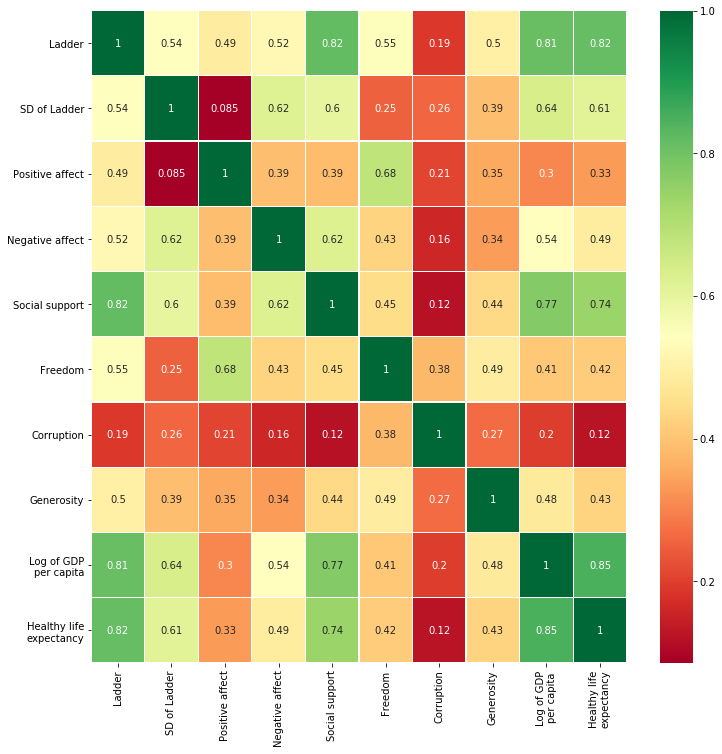

In [95]:

import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [99]:
df1=pd.read_csv('data/avocado.csv')
df1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

In [101]:
df1['AveragePrice'].isnull().sum()

0

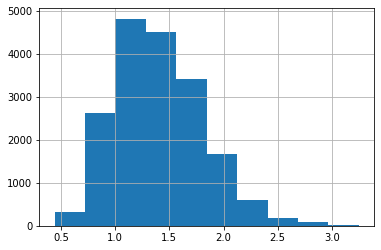

In [102]:
df1['AveragePrice'].hist()
#Гауссовское распределение (нормальное распределение)

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [107]:
#нормализуем данные исследуемых столбцов
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df1[['4046','4225','4770', 'AveragePrice']])
df1_norm = pd.DataFrame(np_scaled)
df1_norm.head()

,0,1,2,3
0,0.000046,0.002660,0.000019,0.316726
1,0.000030,0.002181,0.000023,0.323843
2,0.000035,0.005332,0.000051,0.174377
3,0.000050,0.003516,0.000029,0.227758
4,0.000041,0.002142,0.000030,0.298932


In [118]:
corr, p_value = pearsonr(df1_norm[0], df1_norm[3])
print(corr)
#корреляция обратная,зависимость значений не большая (к-т корреляции стремится к нулю)6 положительное отклонение
#одного значения от среднего коррелируется (ассоциируется) с отрицательным отклонением от среднего другого значения

-0.2083170484878848


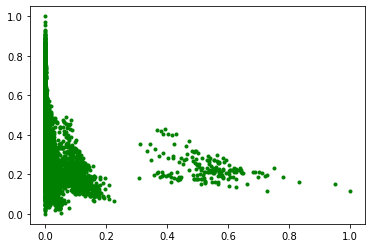

In [120]:
plt.plot(df1_norm[0], df1_norm[3], 'g.')
plt.show()

In [110]:
corr, p_value = pearsonr(df1_norm[1], df1_norm[3])
print(corr)
#корреляция обратная,зависимость значений не большая (к-т корреляции стремится к нулю)6 положительное отклонение
#одного значения от среднего коррелируется (ассоциируется) с отрицательным отклонением от среднего другого значения

-0.17292777250933544


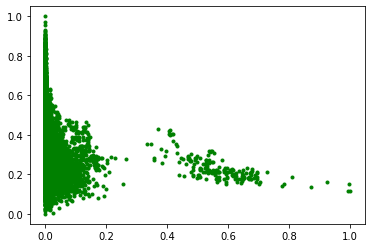

In [116]:
plt.plot(df1_norm[1], df1_norm[3], 'g.')
plt.show()

In [111]:
corr, p_value = pearsonr(df1_norm[2], df1_norm[3])
print(corr)
#корреляция обратная,зависимость значений не большая (к-т корреляции стремится к нулю)6 положительное отклонение
#одного значения от среднего коррелируется (ассоциируется) с отрицательным отклонением от среднего другого значения

-0.17944598397975625


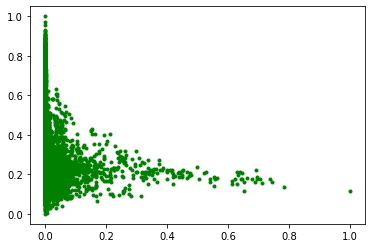

In [117]:
plt.plot(df1_norm[2], df1_norm[3], 'g.')
plt.show()

In [113]:
corr, p_value = pearsonr(df1['4046'], df1['AveragePrice'])
print(corr)

-0.2083170484878848


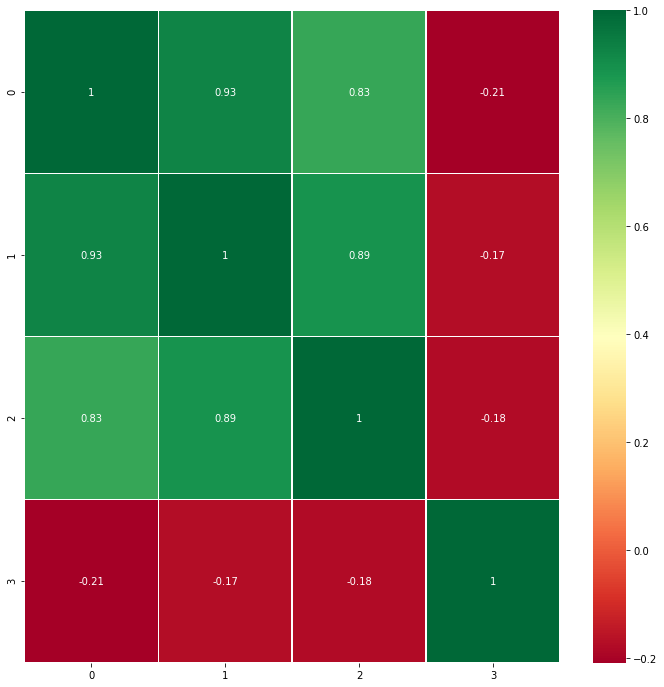

In [108]:
sns.heatmap(df1_norm.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()